<a href="https://colab.research.google.com/github/Praisy-E/Code-for-all/blob/main/Convolutions%2C_Blurring_and_Sharpening_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


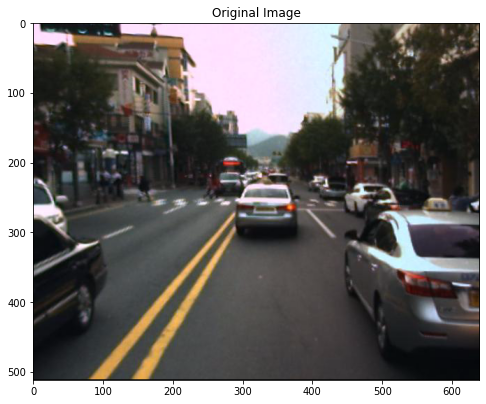

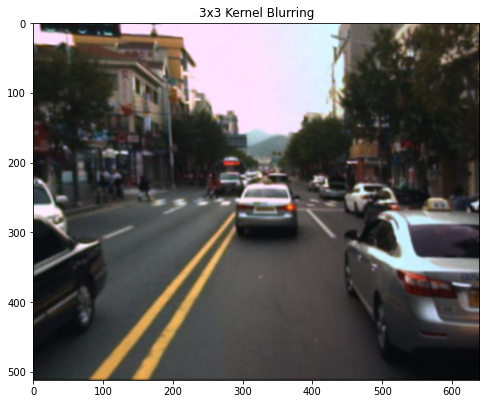

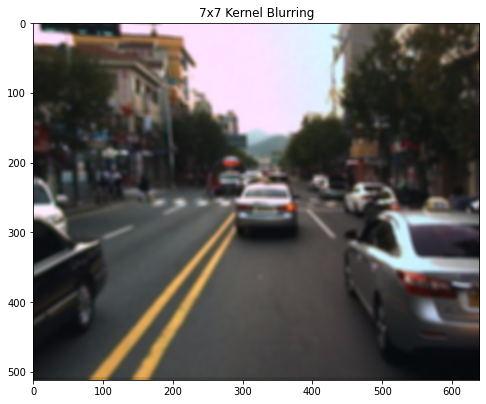

In [5]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/I00115.jpg')
imshow('Original Image', image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

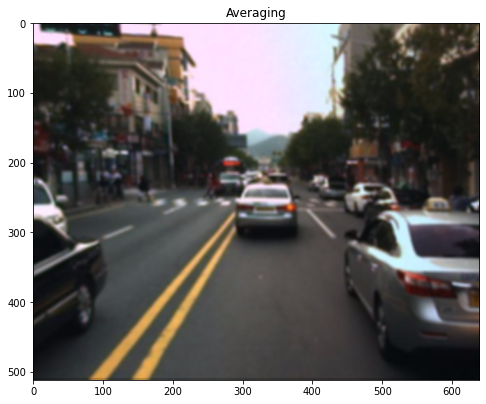

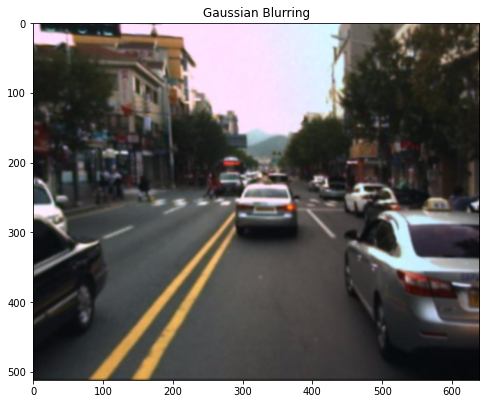

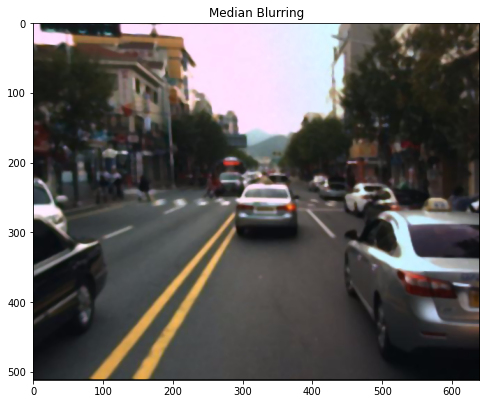

In [6]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/I00115.jpg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

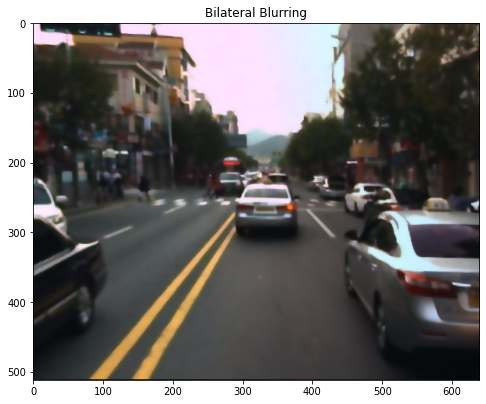

In [7]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

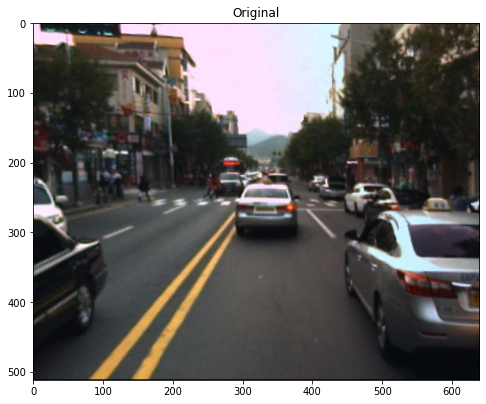

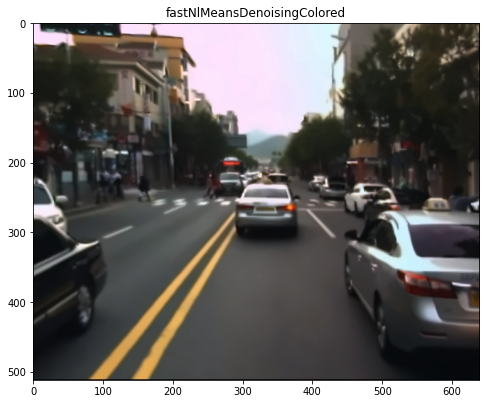

In [8]:
image = cv2.imread('/content/drive/MyDrive/I00115.jpg')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

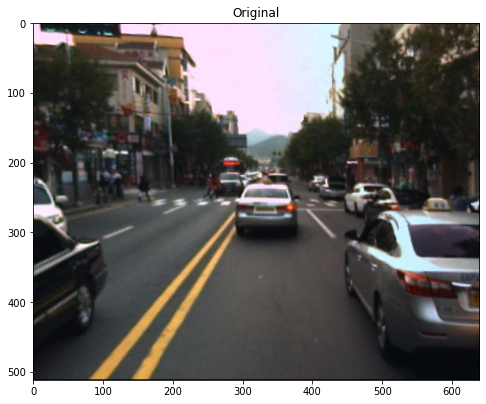

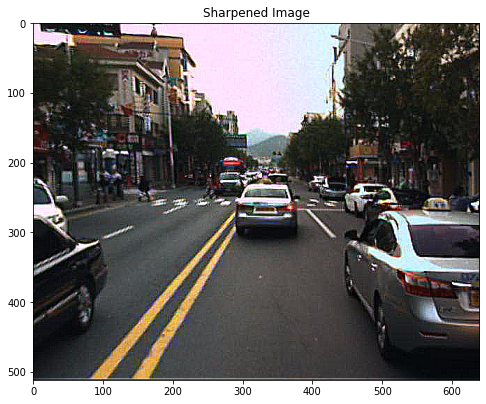

In [9]:
# Loading our image
image = cv2.imread('/content/drive/MyDrive/I00115.jpg')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)